In [1]:
#1.문제정의

In [2]:
#500명의 키와 몸무게, 비만도 라벨을 통해서 비만을 판단하는 모델을 만들어보자

In [3]:
##2.데이터 수집

In [ ]:
#bmi_500.csv불러오기

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [11]:
data = pd.read_csv('bmi_500.csv',
           index_col = 'Label'#label 컬럼 인덱스로 만들기
           )
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [13]:
##label 이 normal 인것만 출력하기
#인덱서:데이터 프레임에서 행/열 단위로 데이터를 불러오기
#인덱서를 사용해서
#loc인덱서 :[행,열] 행과 열에 대한 이름 data.loc['Overweight', 'Height']
#iloc인덱서:[행, 열]행과 열에 대한 번호 data.iloc[3, 1]
data.loc['Normal',:]#:은 전체라는 의믜

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [14]:
#3.데이터 전처리

In [15]:
#결측치, 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [16]:
#기술통계확인, 이상치의 여부
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [ ]:
#탐색적 데이터 분석 EDA

In [17]:
#각 비만도 등급별로 시각화

In [19]:
#normal 만 시각화

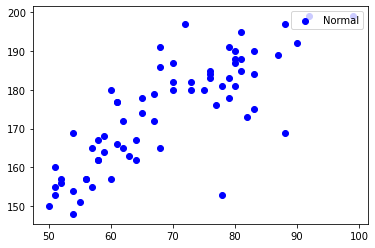

In [34]:
data_normal = data.loc['Normal', :]
plt.scatter(data_normal['Weight'],#x축데이터
            data_normal['Height'],#y축 데이터
           c = 'blue',
           label = 'Normal')        

plt.legend(loc = 'upper right')#우측 상단에 label 띄우기
plt.show()

       


In [35]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [41]:
def drawScatter(label, color):
    data_scatter = data.loc[label, :]
    plt.scatter(data_scatter['Weight'],#x축데이터
            data_scatter['Height'],#y축 데이터
            c = color,
            label = label)    

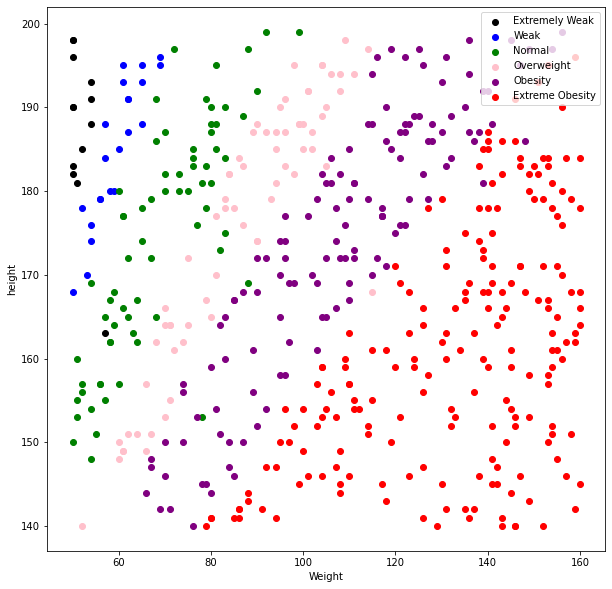

In [49]:
#Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
   #    'Extremely Weak
plt.figure(figsize = (10,10))#그래프 크기
drawScatter('Extremely Weak', 'black')
drawScatter('Weak', 'blue')
drawScatter('Normal', 'green')
drawScatter('Overweight', 'pink')
drawScatter('Obesity', 'purple')
drawScatter('Extreme Obesity', 'red')


plt.legend(loc = 'upper right')
plt.xlabel('Weight')#x축 이름 :weight
plt.ylabel('height')#y축 이름 : height
plt.show()

In [50]:
##5.모델 선택 및 하이퍼 파라미터 튜닝

In [ ]:
# 문제 / 정답
#훈련 / 평가
#로 데이터 나누기
# KNN 모델 사용

In [57]:
#문제(x)/정답(y)
data= pd.read_csv('bmi_500.csv')
X= data.loc[:, 'Height':'Weight']
y = data.loc[:, 'Label']


In [58]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [59]:
#훈련/평가
#70 30
#350 150

X_train = X.iloc[:350,:]
X_test = X.iloc[350:,:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [60]:
#knn 모델 사용
knn = KNeighborsClassifier(n_neighbors = 7)


In [61]:
#6.학습
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
##7.평가

In [63]:
print('train score:', knn.score(X_train,y_train))
print('test score:', knn.score(X_test, y_test))

train score: 0.9028571428571428
test score: 0.9


In [64]:
knn.predict([[174,67],[180,80]])

array(['Normal', 'Overweight'], dtype=object)